#   PRE-PROCESSING:

In [744]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/murat/Library/CloudStorage/OneDrive-UniversityofRochester/UR_Projects/CampaignContribution_Winner_Kaggle/Data'

In [745]:
train = pd.read_csv('../training_data.csv')
test = pd.read_csv('../test_data.csv')


/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_65462/3722845924.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../training_data.csv')


In [746]:

cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 
       # 'contrib_state_deg',
       # 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       # 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       # 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       # 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       # 'state_win_comm'
       ]

network_vars = ['contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr',
                'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg',
                'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg',
                'state_all_wdeg', 'state_all_pr', 'state_all_comm',
                'state_win_deg', 'state_win_wdeg', 'state_win_pr',
                'state_win_comm']

test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



### Missing Values analysis:

In [747]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [748]:
# fake_missing_values = ['0', '0.0', 'None', '']

# # To keep track of all rows with fake-missing values
# rows_to_drop = set()

# for col in cat_vars:
#     col_values = train[col].astype(str)
#     mask = col_values.isin(fake_missing_values)
#     value_counts = col_values[mask].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
#         # Add row indices to the drop set
#         rows_to_drop.update(train[mask].index)
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")

# # Drop all affected rows once
# print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
# train.drop(index=rows_to_drop, inplace=True)
# train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop


In [749]:
# ### Check fake missing values for test data

# fake_missing_values = ['0', '0.0', 'None', '']

# # To keep track of all rows with fake-missing values
# rows_to_drop = set()

# for col in cat_vars:
#     col_values = test[col].astype(str)
#     mask = col_values.isin(fake_missing_values)
#     value_counts = col_values[mask].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
#         # Add row indices to the drop set
#         rows_to_drop.update(test[mask].index)
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")

# # Drop all affected rows once
# print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
# test.drop(index=rows_to_drop, inplace=True)
# test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop


In [750]:
#Removing lines with missing values:
train.dropna(inplace=True)
# 4. Check for duplicates
duplicates = train.duplicated().sum()
print("Duplicates in the dataset:", duplicates)

#Remove duplicates
train.drop_duplicates(inplace=True)

Duplicates in the dataset: 1618


In [751]:
print(train.shape, test.shape)

(167068, 41) (115232, 41)


In [752]:
#replace NAN values with 0:
for col in train_num_vars:
    if col in train.columns:
        train[col] = train[col].fillna(0)

In [753]:
for col in train_num_vars:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce')
for col in test_num_vars:
    if col in test.columns:
        test[col] = pd.to_numeric(test[col], errors='coerce')

In [754]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [755]:
# # Drop states with count less than 5
# state_counts = train['state'].value_counts()

# # Filter to keep only states with at least 5 records
# train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [756]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
# test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 574
🔍 Number of duplicate rows in test: 574
✅ Duplicates removed for train. New shape: (166494, 41)
✅ Duplicates removed for test. New shape: (115232, 41)


### Check association between categorical variables and target variable

### ADDING STATE_CITY as a combined categorical column:


In [757]:
#Adding a state_city column to the train and test dataframes:
train['state_city'] = train['state'] + '_' + train['city']
test['state_city'] = test['state'] + '_' + test['city']
#Add 

In [758]:
train['state_city'].head()

0         MT_MISSOULA
1    OH_CLEVELAND HTS
3          MT_BOZEMAN
4      FL_ORANGE PARK
5          NC_JACKSON
Name: state_city, dtype: object

In [759]:
cat_vars=['general_sector',
 'city',
#  'zip_code',
 'specific_sector',
 'state',
 'contributor_type',
 'state_city']



In [760]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 18.9984, p-value = 0.0000e+00

📊 Analyzing 'city' with 8836 categories:
🧪 ANOVA → F/t-stat = 1.6988, p-value = 1.7730e-302

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.4332, p-value = 0.0000e+00

📊 Analyzing 'state' with 46 categories:
🧪 ANOVA → F/t-stat = 81.9687, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1068.6139, p-value = 0.0000e+00

📊 Analyzing 'state_city' with 19473 categories:
🧪 ANOVA → F/t-stat = 1.6550, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    18.998401   0.000000e+00
2   specific_sector  ANOVA     8.433197   0.000000e+00
3             state  ANOVA    81.968733   0.000000e+00
4  contributor_type  ANOVA  1068.613932   0.000000e+00
5        state_city  ANOVA     1.654970   0.000000e+00
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [761]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

for col in ["city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

In [762]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [763]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               48847
Legal & Lobbying                30293
Retired / Homemakers            23460
Finance & Real Estate           15289
Health & Pharma                 10793
Public Sector & Campaigns        7322
Construction & Manufacturing     5391
Education & Nonprofit            5126
Other / Misc                     4283
Energy & Resources               4004
Retail, Food & Hospitality       3517
Labor & Trade                    2779
Technology & Telecom             1937
Transport & Logistics            1415
Policy & Single‑Issue             775
Entertainment & Media             668
Defense & Military                595
Name: count, dtype: int64


In [764]:
cat_vars.append('general_sector_new')

In [765]:
train.specific_sector.value_counts().to_clipboard()

### Drop specific sector column, since we already have bigger secotr categories

In [766]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

In [767]:
# # ------------------------------------------------------------------
# # 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# # ------------------------------------------------------------------
# cat_small = ["contributor_type"]      # only 3 levels
# train = pd.get_dummies(train, columns=cat_small, drop_first=True)
# test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# # Keep column order identical in train & test after one‑hot:
# missing_cols = [c for c in train.columns if c not in test.columns]
# for c in missing_cols:
#     print(f'{c} column is missing in test data')
#     test[c] = 0
# test = test[train.columns.drop("winner_ratio")]         # align

# print("✅  Pre‑processing finished. Shapes:", train.shape)
# print("✅  Pre‑processing finished. Shapes:",   test.shape)
   


### Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [768]:
# 1) Define the ratios you want to keep
ratio_cols = [
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio'
]

# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_count',
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_count',
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'contribution_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_count', 'candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [769]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [770]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


In [771]:
test.drop(columns='winner_ratio', inplace= True)

In [772]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ TRAIN_Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)

# # Check for non-finite values in test data and replace with 0:
def replace_nonfinite_with_zero(df, cols):
    """Replace non-finite values (NaN, inf, -inf) with 0 in specified columns."""
    # Replace only in specified columns
    for col in cols:
        bad_mask = ~np.isfinite(df[col])
        num_bad = bad_mask.sum()
        if num_bad > 0:
            print(f"→ IN TEST: Replacing {num_bad} non-finite values in column '{col}' with 0")
            df.loc[bad_mask, col] = 0
    return df



# Apply to train
train = drop_nonfinite_rows(train, train_num_vars)

# Apply to test
test = replace_nonfinite_with_zero(test, test_num_vars)

# test = drop_nonfinite_rows(test, test_num_vars)

→ TRAIN_Dropping 0 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']
→ TRAIN_Dropping 0 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_

### Check distribution of the different features

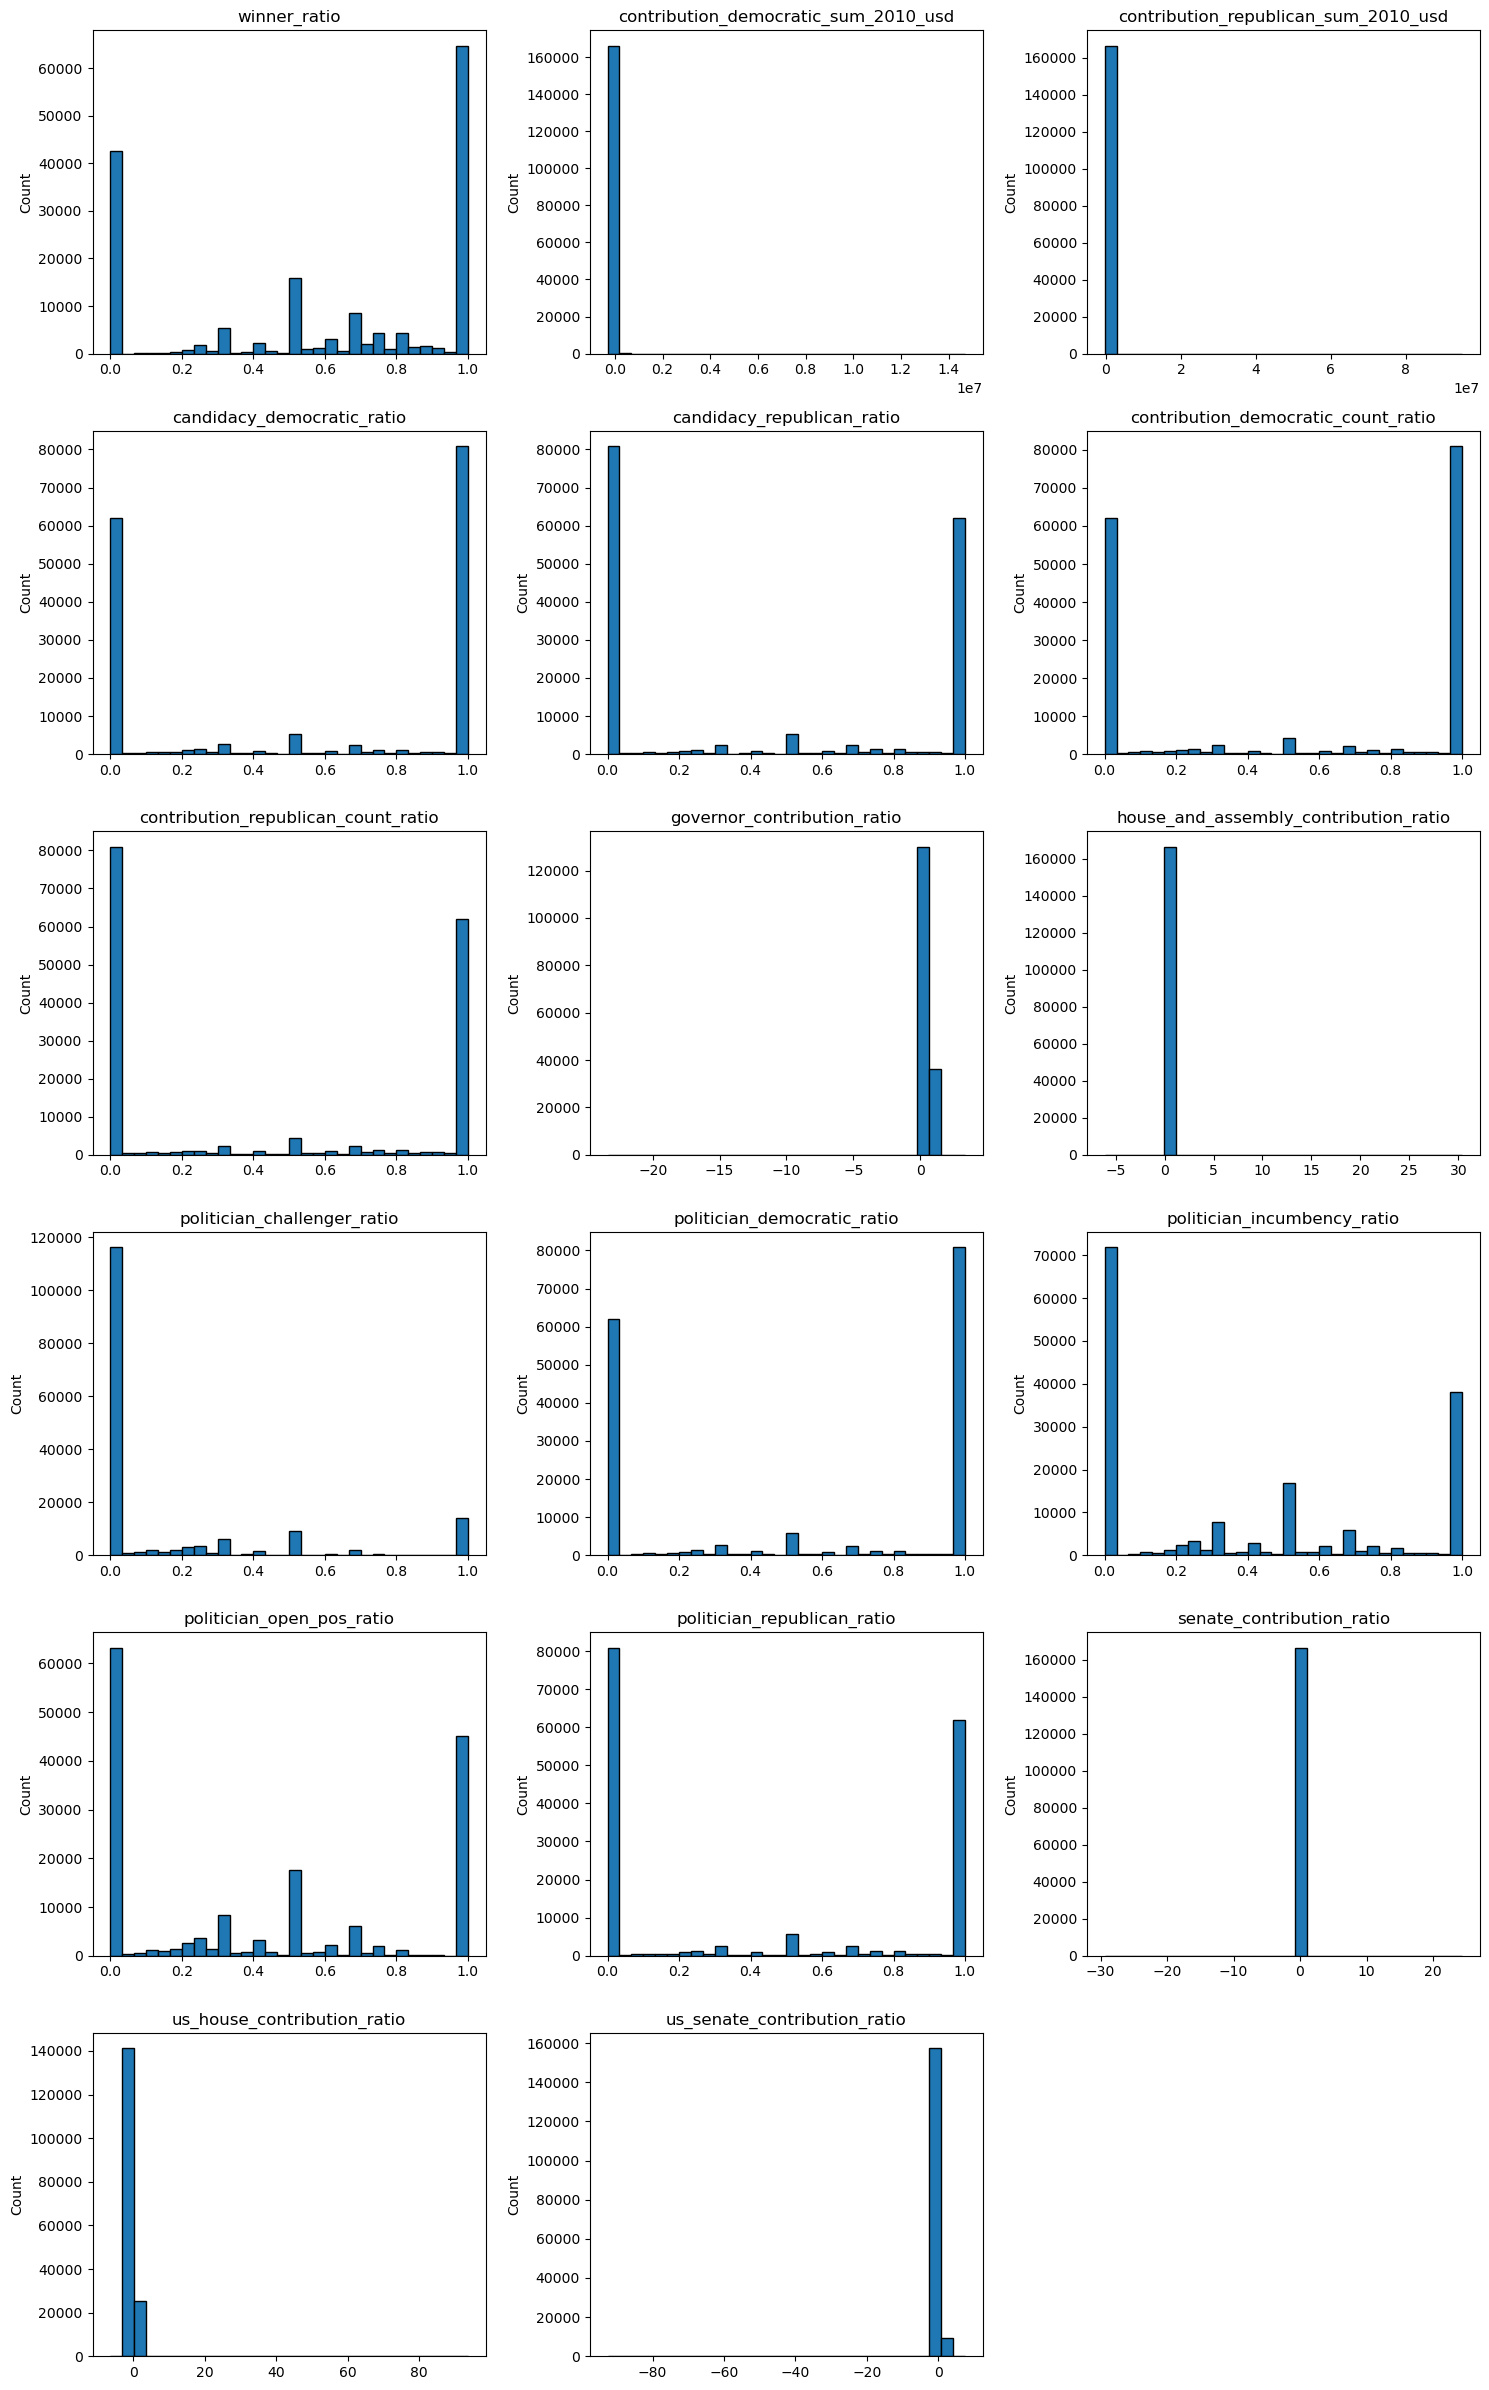

In [773]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


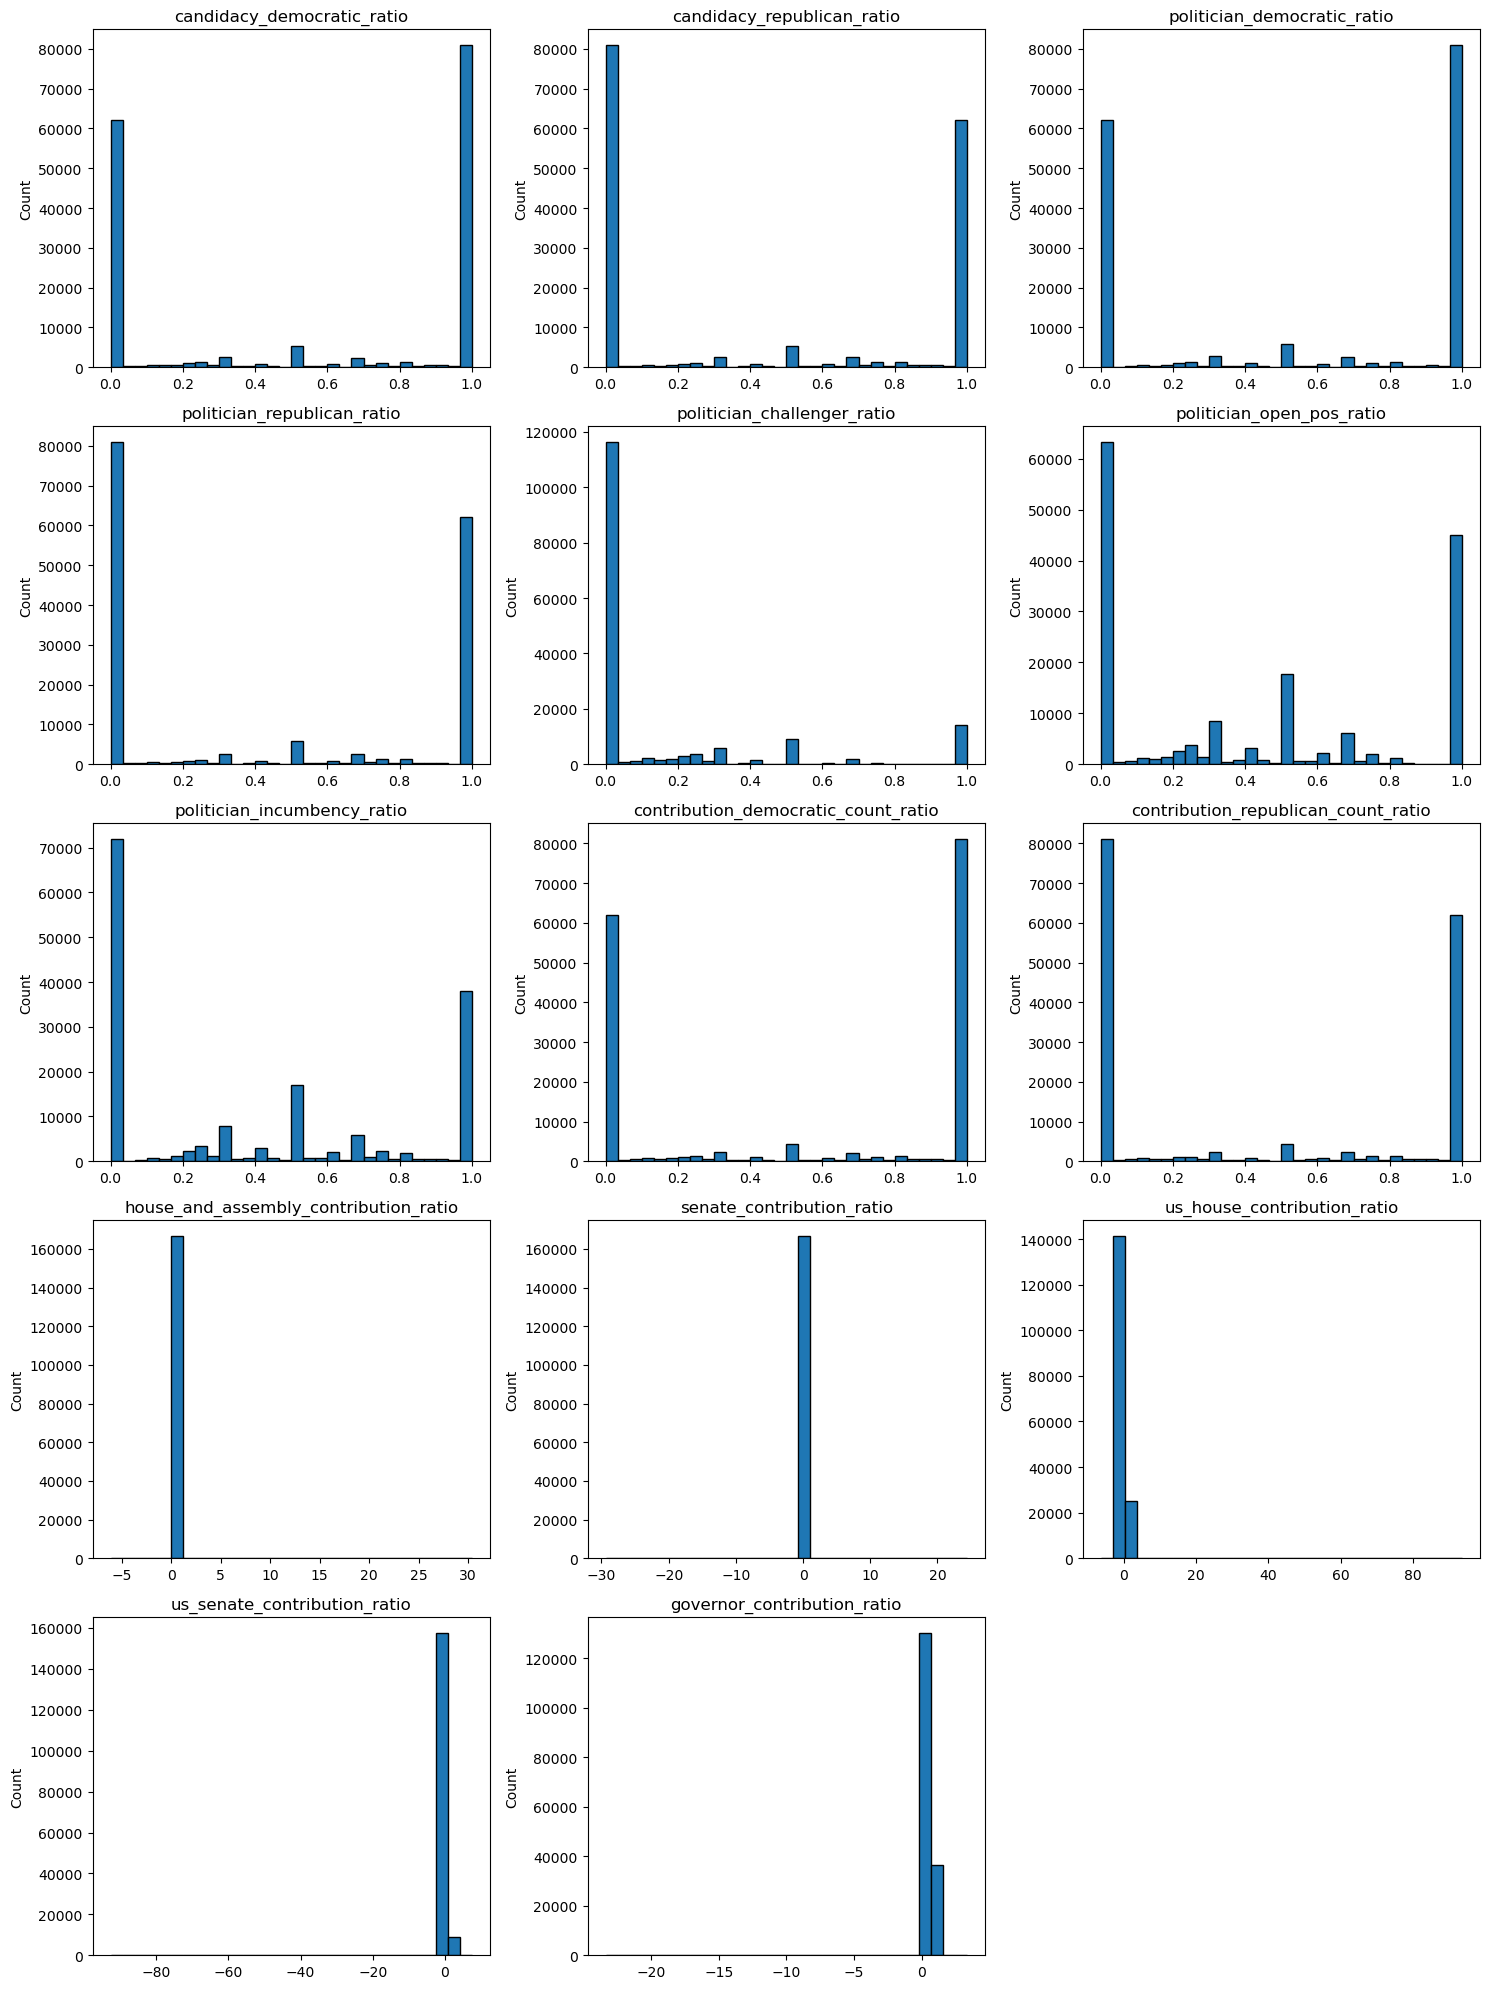

In [774]:

plot_histograms(train, ratio_cols)


### Treat ratio columns to fix skewness or zero and 1 inflated data

In [775]:
import numpy as np
import pandas as pd


THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)
test.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())



Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.487850
politician_challenger_ratio      0.320441
politician_open_pos_ratio        0.254718
governor_contribution_ratio      0.137240
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'state_city', 'general_sector_new', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_is_zero', 'gover

In [776]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [777]:
set(train.columns)-set(test.columns)

{'winner_ratio'}

In [778]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'state_city',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit'],
      dtype='object')

In [779]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['state', 'contributor_type', 'state_city', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']


### Treat Network data columns

In [780]:
# features["cat_vars"]

In [781]:

# network_cols = [
#     'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
#     'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
#     'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
#     'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
# ]

# plot_histograms(train, network_cols)


In [782]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
# non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
# print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# # ---------------------------------
# X = train[non_constant].copy()

# # a) log1p
# X_log  = np.log1p(X)

# # b) Yeo‑Johnson – uncomment if you have negatives
# # pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# # X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# # ---------------------------------
# # 4. Correlation with the target
# # ---------------------------------
# y = train['winner_ratio']

# pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
# spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

# print("\n=== Pearson (after log1p) ===")
# print(pearson)

# print("\n=== Spearman (rank‑based, raw values) ===")
# print(spearman)


In [783]:
# from sklearn.preprocessing import PowerTransformer

# # 1) fit Yeo-Johnson
# pt = PowerTransformer(method="yeo-johnson", standardize=False)
# X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
#                      columns=non_constant, index=train.index)

# # 2) Pearson corr on Yeo‑Johnson
# pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
# print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [784]:
# train.drop(network_cols, axis=1, inplace= True)
# test.drop(network_cols, axis=1, inplace= True)

In [785]:
# for col in network_cols:
#     features['train_num_vars'].remove(col)
#     # features['test_num_vars'].remove(col)

In [786]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [787]:
# def dropZeroRecords(df, cols):
#     for col in cols:
#         print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
#         df = df[df[col]>0]
#     return df

# cols = ["contribution_total_sum_2010_usd"]
# train = dropZeroRecords(train, cols)
# test = dropZeroRecords(train, cols)

In [788]:
# def dropNegRecords(df, col):
#     for col in cols:
#         print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
#         df = df[df[col]>0]
#     return df

# cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
# train = dropNegRecords(train, cols)
# print("\n\n")
# test = dropNegRecords(test, cols)

In [789]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-pac

In [790]:
features['cat_vars']

['state', 'contributor_type', 'state_city', 'general_sector_new']

In [791]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

features_keep_penalised = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
                               if col not in features["logit_vars"]]


# features_tree   = create_feature_lists(train)
# features["train_num_vars"] += tree_keep['train_num_vars']


# features_nn     = create_feature_lists(train)
# features["train_num_vars"] += nn_keep['train_num_vars']



In [792]:
'dem_sum_ratio' in features['train_num_vars'],  'rep_sum_ratio' in features['train_num_vars']

(True, True)

In [793]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features


cols = ["dem_sum_ratio", "rep_sum_ratio"]
train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)
  

In [794]:
'dem_sum_ratio' in features['train_num_vars']

False

In [795]:
'dem_sum_ratio' in features['train_num_vars']

False

In [796]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'state_city',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero'

In [797]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

set()

In [798]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

In [799]:
#object data types
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols

['state', 'contributor_type', 'state_city', 'general_sector_new']

##  LABEL ENCODING:

In [800]:
from sklearn.preprocessing import LabelEncoder
# 2. Group Top 50 + Other for state_city
top_n = 50
freq = train['state_city'].value_counts()
top_cities = freq.nlargest(top_n).index


In [801]:

train['state_city_grp'] = train['state_city'].where(
    train['state_city'].isin(top_cities),
    'Other'
)

# 3. Label Encode state_city_grp
le_city = LabelEncoder()
train['state_city_le'] = le_city.fit_transform(train['state_city_grp'])

# 4. Label Encode all other categoricals
# cat_cols = ['contributor_type','general_sector_new ']
le = LabelEncoder()
for col in cat_cols:
    if col != 'state_city':
        # Check if the column exists in the DataFrame
        if col in train.columns:
            # Apply Label Encoding
            train[col + '_le'] = le.fit_transform(train[col])

# 5. Drop original string columns
train.drop(columns=['state_city_grp'] + cat_cols, inplace=True)

# ✅ Now you have all categoricals turned into numeric columns:
# - state_city_le
# - general_sector_le
# - specific_sector_le
# - contributor_type_le


In [802]:
#LABEL ENCODE TEST DATA:
test['state_city_grp'] = test['state_city'].where(
    test['state_city'].isin(top_cities),
    'Other'
)

# 3. Label Encode state_city_grp
le_city = LabelEncoder()
test['state_city_le'] = le_city.fit_transform(test['state_city_grp'])

# 4. Label Encode all other categoricals
le = LabelEncoder()
for col in cat_cols:
    if col != 'state_city':
        # Check if the column exists in the DataFrame
        if col in test.columns:
            # Apply Label Encoding
            test[col + '_le'] = le.fit_transform(test[col])

# 5. Drop original string columns
test.drop(columns=['state_city_grp'] + cat_cols, inplace=True)

In [803]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


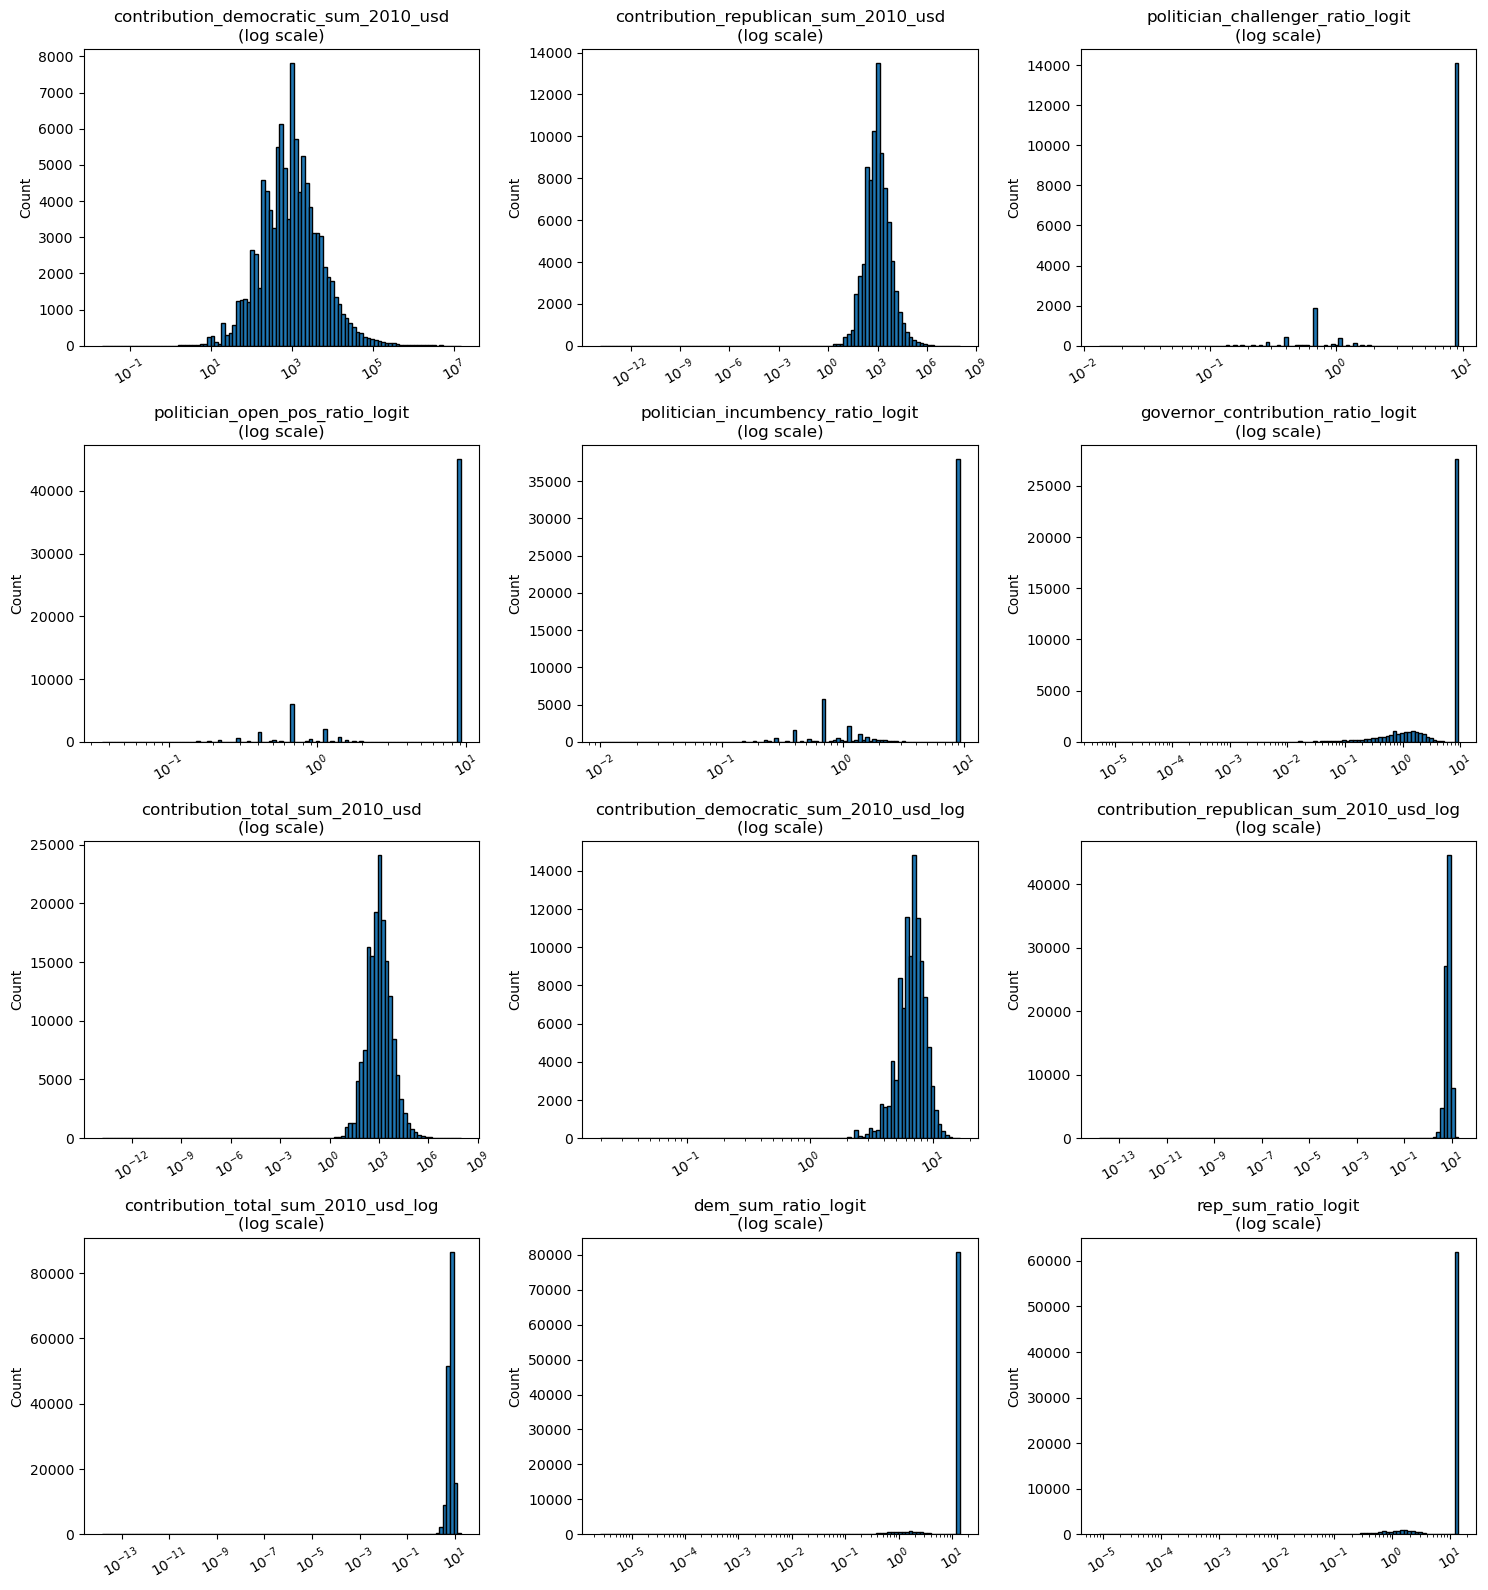

In [804]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [805]:
train_bkp = train.copy()

In [806]:
import numpy as np
from scipy.stats import skew

# 1) List all nonnegative columns you’d like to check
to_check = [
    'contribution_democratic_sum_2010_usd',"contribution_republican_sum_2010_usd",
    'contribution_total_sum_2010_usd'
]

# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  contribution_democratic_sum_2010_usd  98.281
  contribution_republican_sum_2010_usd  303.100
  politician_challenger_ratio_logit   1.533
  politician_open_pos_ratio_logit   0.234
  politician_incumbency_ratio_logit   0.388
  governor_contribution_ratio_logit   1.045
  contribution_total_sum_2010_usd  255.087
  contribution_democratic_sum_2010_usd_log  -0.107
  contribution_republican_sum_2010_usd_log   0.277
  contribution_total_sum_2010_usd_log   0.243
  dem_sum_ratio_logit   -0.225
  rep_sum_ratio_logit    0.225


### Drop actual contribution_sum columns for both REP and DEM

In [807]:

cols_to_drop = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_total_sum_2010_usd']

train, features = drop_extra_cols(train, features, cols_to_drop)
test, features = drop_extra_cols(test, features, cols_to_drop)

## Check VIF among numerical columns

In [808]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                                    feature         VIF
7                       dem_sum_ratio_logit         inf
8                       rep_sum_ratio_logit         inf
6       contribution_total_sum_2010_usd_log  133.191158
4  contribution_democratic_sum_2010_usd_log   49.910996
5  contribution_republican_sum_2010_usd_log   34.655012
0         politician_challenger_ratio_logit    6.313090
2         politician_incumbency_ratio_logit    5.571084
1           politician_open_pos_ratio_logit    5.371210
3         governor_contribution_ratio_logit    1.511187


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Check correlation of numerical variables with target variable

In [809]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit           0.501220
politician_challenger_ratio_logit          -0.317325
politician_open_pos_ratio_logit            -0.248402
governor_contribution_ratio_logit          -0.144080
contribution_total_sum_2010_usd_log         0.138721
contribution_republican_sum_2010_usd_log    0.086162
contribution_democratic_sum_2010_usd_log    0.044557
rep_sum_ratio_logit                         0.024204
dem_sum_ratio_logit                        -0.024204
dtype: float64


In [810]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit           0.487850
contribution_total_sum_2010_usd_log         0.070086
contribution_republican_sum_2010_usd_log    0.055700
rep_sum_ratio_logit                         0.027440
contribution_democratic_sum_2010_usd_log    0.010415
dem_sum_ratio_logit                        -0.027440
governor_contribution_ratio_logit          -0.137333
politician_open_pos_ratio_logit            -0.254718
politician_challenger_ratio_logit          -0.320441
dtype: float64

In [811]:
cols_to_drop_later = ['dem_sum_ratio_logit']

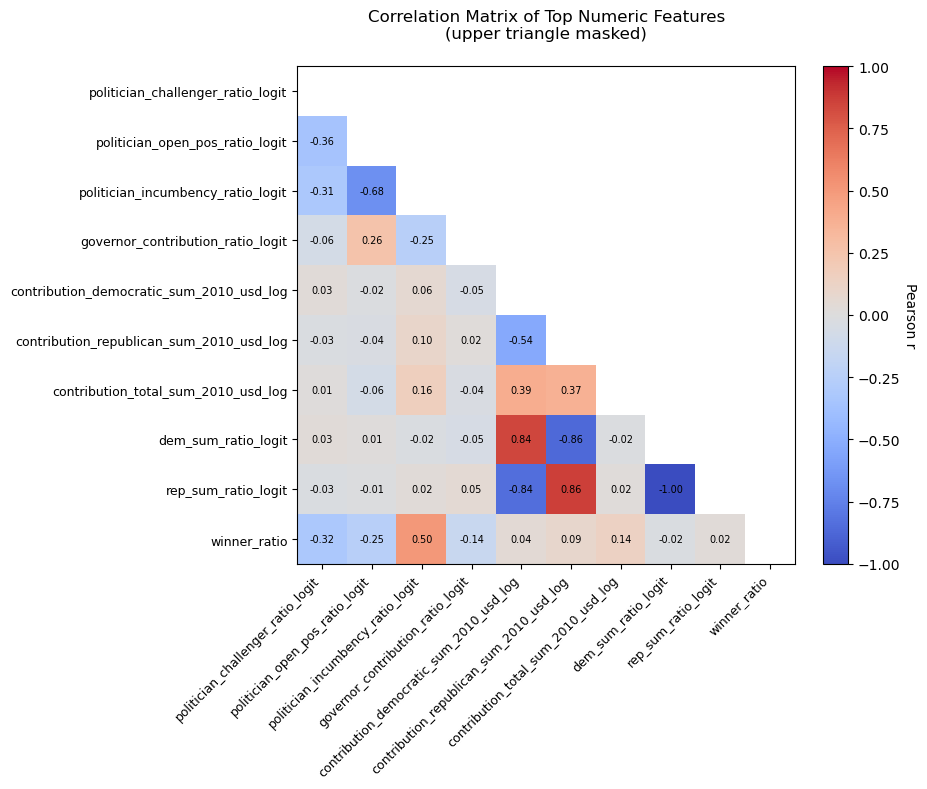

In [812]:
import matplotlib.pyplot as plt


train_num_vars = features['train_num_vars'] + [features['tar_var']]

# 2) Compute the correlation matrix
corr = train[train_num_vars].corr()

# 3) Build a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap, masking out the upper triangle
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(np.ma.masked_where(mask, corr), 
               cmap=cmap, vmin=-1, vmax=1)

# Set tick labels
ax.set_xticks(np.arange(len(train_num_vars)))
ax.set_yticks(np.arange(len(train_num_vars)))
ax.set_xticklabels(train_num_vars, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(train_num_vars, fontsize=9)

# Annotate each cell in the lower triangle with its correlation value
for i in range(len(train_num_vars)):
    for j in range(len(train_num_vars)):
        if not mask[i, j]:  # only annotate lower triangle
            val = corr.iloc[i, j]
            ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                    color='black', fontsize=7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r", rotation=270, labelpad=12)

ax.set_title("Correlation Matrix of Top Numeric Features\n(upper triangle masked)", pad=20)
plt.tight_layout()
plt.show()

### Pipeline to split data, encode categorical columns, and then model building

## Model training on transformed tar_var

In [813]:
train_bkp = train.copy()

In [814]:
train = train_bkp.copy()

In [815]:
train.columns

Index(['winner_ratio', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit', 'rep_sum_ratio_logit', 'state_city_le',
       'state_le', 'cont

### LOG1 and LOGIT on WINNER RATIO:

In [816]:
import numpy as np
from scipy.special import logit, expit

eps = 1e-6  # tiny number to prevent numerical issues

# Step 1: log1p transform (safe for zeros)
winner_ratio_log1p = np.log1p(train["winner_ratio"])

# Step 2: clip and apply logit
winner_ratio_log1p_clipped = winner_ratio_log1p.clip(eps, 1 - eps)
train["winner_ratio_log1p_logit"] = logit(winner_ratio_log1p_clipped)


In [817]:
# Target column
# target_col = 'winner_ratio'
target_col = 'winner_ratio_log1p_logit'

In [818]:


# Label-encoded categorical variables (identified manually)
categorical_cols = [
    'general_sector_new',
    'state_city_le',
    'state_le',
    'contributor_type_le'
]

# All columns
all_cols = train.columns.tolist()

# Numerical features are all the rest (excluding target + categorical ones)
numerical_cols = [col for col in all_cols if col not in categorical_cols + [target_col]+['winner_ratio']]

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['general_sector_new', 'state_city_le', 'state_le', 'contributor_type_le']

Numerical columns:
['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one', 'governor_contribution_ratio_logit', 'contribution_democratic_sum_2010_usd_log', 'contribution_republican_sum_2010_usd_log', 'contribution_total_sum_2010_usd_log', 'contribution_democratic_sum_2010_usd_is_zero', 'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero', 'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one', 'dem_sum_ratio_logit', 'rep_sum_ratio_logit', 'general_sector_new_le']


In [819]:
train.isna().sum()

winner_ratio                                      0
politician_challenger_ratio_is_zero               0
politician_challenger_ratio_is_one                0
politician_challenger_ratio_logit                 0
politician_open_pos_ratio_is_zero                 0
politician_open_pos_ratio_is_one                  0
politician_open_pos_ratio_logit                   0
politician_incumbency_ratio_is_zero               0
politician_incumbency_ratio_is_one                0
politician_incumbency_ratio_logit                 0
governor_contribution_ratio_is_zero               0
governor_contribution_ratio_is_one                0
governor_contribution_ratio_logit                 0
contribution_democratic_sum_2010_usd_log        201
contribution_republican_sum_2010_usd_log        160
contribution_total_sum_2010_usd_log             302
contribution_democratic_sum_2010_usd_is_zero      0
contribution_republican_sum_2010_usd_is_zero      0
dem_sum_ratio_is_zero                             0
dem_sum_rati

In [820]:
cols_with_nan = [
    'contribution_democratic_sum_2010_usd_log',
    'contribution_republican_sum_2010_usd_log',
    'contribution_total_sum_2010_usd_log'
]

train[cols_with_nan] = train[cols_with_nan].fillna(0)

# ELASTICNET MODEL:


[  0.00s] Loading & splitting data
[  0.10s] Fitting ElasticNet on raw target


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


▶ Raw-target ElasticNet  val MSE = 0.24752


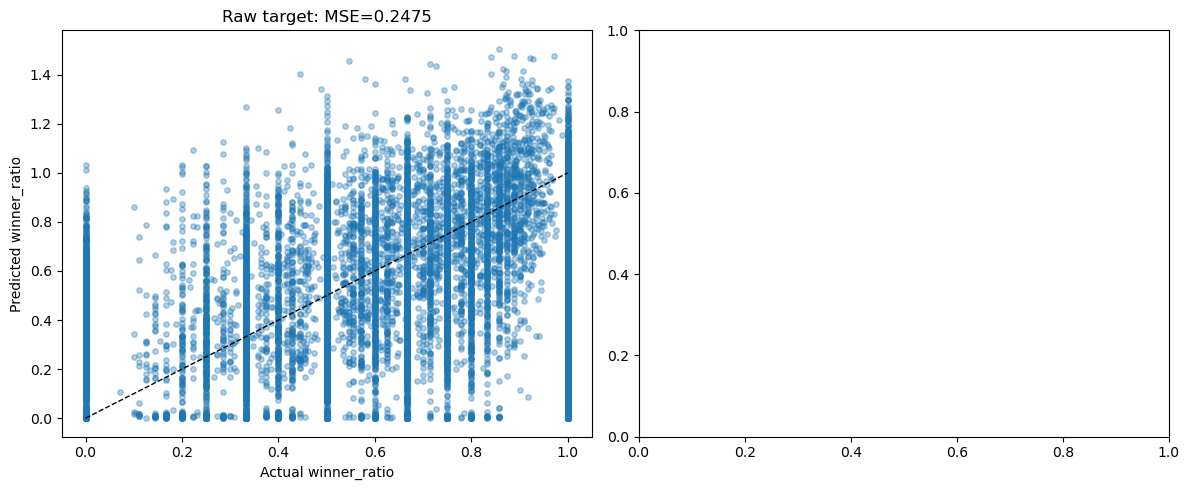

[142.84s] Done


In [650]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.model_selection           import train_test_split
from sklearn.preprocessing             import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose                   import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline                  import Pipeline
from sklearn.linear_model              import ElasticNetCV
from sklearn.metrics                   import mean_squared_error

# ───────────────────────────────────────────────────────────────────────────────
# 0 · Timing helper (optional)
# ───────────────────────────────────────────────────────────────────────────────
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.2f}s] {msg}")

# ───────────────────────────────────────────────────────────────────────────────
# 1 · Prepare data
# ───────────────────────────────────────────────────────────────────────────────
tick("Loading & splitting data")
# assume `train` is your DataFrame already in memory
X=train.drop(columns=[target_col,'winner_ratio'])
y=train[target_col]

cat_cols = categorical_cols
# cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = numerical_cols

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 2 · Preprocessor
# ───────────────────────────────────────────────────────────────────────────────
pre = ColumnTransformer([
    # ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(),                     num_cols)
], sparse_threshold=0.3)

# ───────────────────────────────────────────────────────────────────────────────
# 3 · ElasticNetCV settings
# ───────────────────────────────────────────────────────────────────────────────
enet = ElasticNetCV(
    l1_ratio=[0.1,0.3,0.5,0.7,0.9,1.0],
    alphas=np.logspace(-4,1,30),
    cv=15,
    max_iter=50_000,    # increase for convergence
    tol=1e-3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# ───────────────────────────────────────────────────────────────────────────────
# 4 · Pipeline A: Raw target
# ───────────────────────────────────────────────────────────────────────────────
tick("Fitting ElasticNet on raw target")
pipe_raw = Pipeline([
    ("pre", pre),
    ("enet", enet)
])
pipe_raw.fit(X_tr, y_tr)

y_pred_raw = pipe_raw.predict(X_val)

# Step 1: Apply inverse-logit (expit)
y_pred_log1p = expit(y_pred_raw)

# Step 2: Apply inverse-log1p (expm1)
y_pred_raw = np.expm1(y_pred_log1p)


# Inverse-transform y_val too!
y_val_log1p = expit(y_val)      # Inverse of logit
y_val = np.expm1(y_val_log1p)  # Inverse of log1p


mse_raw    = mean_squared_error(y_val, y_pred_raw)
print(f"\n▶ Raw-target ElasticNet  val MSE = {mse_raw:.5f}")

# # ───────────────────────────────────────────────────────────────────────────────
# # 5 · Pipeline B: arcsin‑√–transformed target
# # ───────────────────────────────────────────────────────────────────────────────
# tick("Fitting ElasticNet with arcsin‑√ target transform")
# asin_sqrt = FunctionTransformer(
#     func         = lambda u: np.arcsin(np.sqrt(u)),
#     inverse_func = lambda v: np.sin(v)**2,
#     validate     = True
# )

# ttr = TransformedTargetRegressor(
#     regressor   = enet,
#     transformer = asin_sqrt
# )

# pipe_ttr = Pipeline([
#     ("pre", pre),
#     ("ttr", ttr)
# ])
# pipe_ttr.fit(X_tr, y_tr)

# y_pred_ttr = pipe_ttr.predict(X_val)

# # Step 1: Apply inverse-logit (expit)
# y_pred_ttr_log1p = expit(y_pred_ttr)

# # Step 2: Apply inverse-log1p (expm1)
# y_pred_ttr = np.expm1(y_pred_ttr_log1p)


# mse_ttr    = mean_squared_error(y_val, y_pred_ttr)
# print(f"▶ Arcsin√-target ElasticNet  val MSE = {mse_ttr:.5f}\n")

# ───────────────────────────────────────────────────────────────────────────────
# 6 · Diagnostic plots
# ───────────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12,5))



# Raw target
axes[0].scatter(y_val, y_pred_raw, alpha=0.35, s=15)
axes[0].plot([0,1],[0,1],"k--", lw=1)
axes[0].set_title(f"Raw target: MSE={mse_raw:.4f}")
axes[0].set_xlabel("Actual winner_ratio")
axes[0].set_ylabel("Predicted winner_ratio")

# # Arcsin‑√ target
# axes[1].scatter(y_val, y_pred_ttr, alpha=0.35, s=15)
# axes[1].plot([0,1],[0,1],"k--", lw=1)
# axes[1].set_title(f"Arcsin√ target: MSE={mse_ttr:.4f}")
# axes[1].set_xlabel("Actual winner_ratio")
# axes[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()
tick("Done")


In [743]:
train.isna().sum()
# Check for NaN values in the target column

city                                             1468
zip_code                                         3929
specific_sector                                     0
state                                               0
contributor_type                                    0
winner_ratio                                        0
candidacy_count                                     0
candidacy_democratic_count                          0
candidacy_republican_count                          0
contribution_count                                  0
contribution_democratic_count                       0
contribution_republican_count                       0
politician_challenger_count                         0
politician_count                                    0
politician_democratic_count                         0
politician_incumbency_count                         0
politician_open_pos_count                           0
politician_republican_count                         0
contribution_democratic_sum_

# ELASTICNET with ARCSIN

In [742]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special    import logit, expit
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model   import ElasticNetCV
from sklearn.metrics        import mean_squared_error

X=train.drop(columns=[target_col,'winner_ratio'])
y=train[target_col]

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Any NaNs in X_tr?")
print(X_tr.isna().sum().loc[lambda s: s>0])

print("\nAny NaNs in y_tr?")
print(pd.Series(y_tr).isna().sum())

KeyError: "['winner_ratio_log1p_logit'] not found in axis"

In [ ]:


# 1) PREPROCESSOR: only scale numerics, pass through label‐encoded cats
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
], remainder="passthrough")

# 2) BASE REGRESSOR
enet = ElasticNetCV(
    l1_ratio=[0.1,0.5,1.0],
    alphas=np.logspace(-3,1,10),
    cv=5,
    n_jobs=-1,
    random_state=42,
    max_iter=20_000
)

# 3) PIPELINE A: raw target
pipe_raw = Pipeline([("pre", pre), ("enet", enet)])
pipe_raw.fit(X_tr, y_tr)
y_pred_raw = pipe_raw.predict(X_val)

# 4) PIPELINE B: arcsin–√ transform
asin_sqrt = FunctionTransformer(
    func         = lambda u: np.arcsin(np.sqrt(u.clip(0,1))),
    inverse_func = lambda v: np.sin(v)**2,
    validate     = True
)
ttr_asin = TransformedTargetRegressor(regressor=enet, transformer=asin_sqrt)
pipe_asin = Pipeline([("pre", pre), ("ttr", ttr_asin)])
pipe_asin.fit(X_tr, y_tr)
y_pred_asin = pipe_asin.predict(X_val)

# 5) PIPELINE C: log1p → logit transform
eps = 1e-6
log1p_logit = FunctionTransformer(
    func         = lambda u: logit(np.log1p(u).clip(eps,1-eps)),
    inverse_func = lambda v: np.expm1(expit(v)),
    validate     = True
)
ttr_logit = TransformedTargetRegressor(regressor=enet, transformer=log1p_logit)
pipe_logit = Pipeline([("pre", pre), ("ttr", ttr_logit)])
pipe_logit.fit(X_tr, y_tr)
y_pred_logit = pipe_logit.predict(X_val)

# 6) INVERSE‐TRANSFORM THE ACTUALS
#    (they’re still in raw [0,1], so no need for inverse—just assign)
y_act = y_val.values

# 7) COMPUTE MSE in original scale
mse_raw   = mean_squared_error(y_act,    y_pred_raw)
mse_asin  = mean_squared_error(y_act,    y_pred_asin)
mse_logit = mean_squared_error(y_act, y_pred_logit)

# 8) PLOT side by side
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=True)

for ax, (y_pred, title, mse) in zip(axes, [
    (y_pred_raw,   "Raw target",     mse_raw),
    (y_pred_asin,  "Arcsin√–TTR",    mse_asin),
    (y_pred_logit, "Log1p→Logit–TTR", mse_logit)
]):
    ax.scatter(y_act, y_pred, alpha=0.3, s=10)
    ax.plot([0,1],[0,1],"k--",lw=1)
    ax.set_title(f"{title}\nMSE={mse:.4f}")
    ax.set_xlabel("Actual winner_ratio")
    ax.set_ylabel("Predicted winner_ratio")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

plt.tight_layout()
plt.show()


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/compose/_target.py:210: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(
/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_65462/1955563328.py:52: RuntimeWarning: invalid value encountered in log1p
  func         = lambda u: logit(np.log1p(u).clip(eps,1-eps)),


ValueError: Input contains NaN.

# ENSEMBLE MODELS_ RF:

In [652]:
train.columns

Index(['winner_ratio', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit', 'rep_sum_ratio_logit', 'state_city_le',
       'state_le', 'cont

In [651]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.special import expit
import numpy as np


X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 1. Preprocessor
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
], remainder='passthrough')

# 2. Random Forest Grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

# 3. Full pipeline
tick("Fitting Random Forest with log1p+logit target transform")

pipe_rf = Pipeline([
    ("pre", pre),
    ("rf", grid_rf)
])

# 4. Train
pipe_rf.fit(X_tr, y_tr)

# 5. Predict
y_pred_rf = pipe_rf.predict(X_val)

# 6. Inverse transformations
y_pred_rf_log1p = expit(y_pred_rf)
y_pred_rf_final = np.expm1(y_pred_rf_log1p)

# Inverse-transform y_val too!
y_val_log1p = expit(y_val)      # Inverse of logit
y_val = np.expm1(y_val_log1p)  # Inverse of log1p


# 7. Evaluate
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_val, y_pred_rf_final)
print(f"\n▶ Random Forest (log1p-logit target) val MSE = {mse_rf:.5f}")


[196.73s] Fitting Random Forest with log1p+logit target transform
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  46.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  46.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  47.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  47.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  47.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  50.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  50.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  51.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 2.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 2.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; t

/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=20, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=20, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=20, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END max_depth=20, min_samples_split=5, n_estimators=300; total time= 3.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, min_samples_split=5, n_estimators=300; total time= 3.2min
[CV] END max_depth

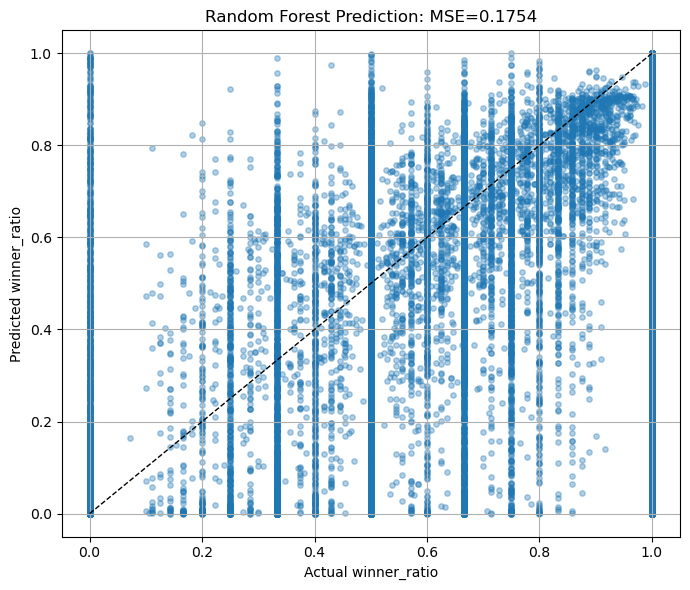

In [653]:

# Simple scatter plot of actual vs predicted
plt.figure(figsize=(7,6))

plt.scatter(y_val, y_pred_rf_final, alpha=0.35, s=15)
plt.plot([0,1], [0,1], "k--", lw=1)  # perfect prediction line
plt.title(f"Random Forest Prediction: MSE={mse_rf:.4f}")
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.grid(True)
plt.tight_layout()
plt.show()
